In [1]:
from fn_cfg import *
import params as cfg

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
version = 1.1
filename = '0_1_12072018_1206'
localPath = '/Users/joshuaighalo/Downloads/raw'

version
stimulusType
eegHeadsetID
computerInfo
contextualInfo
scanDetails
impedances
stimSequence
context
channels
startTime
endTime
1.1.1
['/Users/joshuaighalo/Downloads/raw/0_1_12072018_1206/0_1_12072018_1206.bin']
channel P07 utilized
channel 0Z utilized
data contains Fz, Cz, Pz & two EOG channels


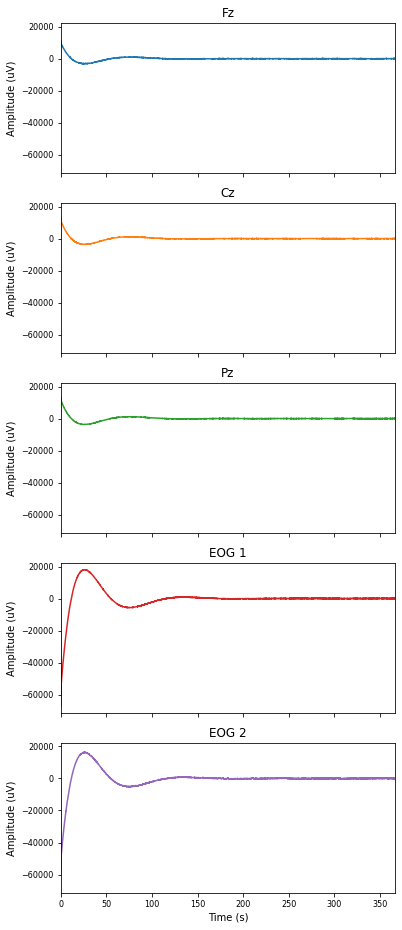

In [3]:
device = importFile.neurocatch()
fileObjects = device.init(version,filename,localPath)
rawEEG = fileObjects[0]
rawEOG = fileObjects[1]
rawEEGEOG = fileObjects[2]
time = fileObjects[3]
trigOutput = fileObjects[4]

plots(time,rawEEGEOG,titles=cfg.channelNames_1,figsize=cfg.figure_size,pltclr=cfg.plot_color_1)

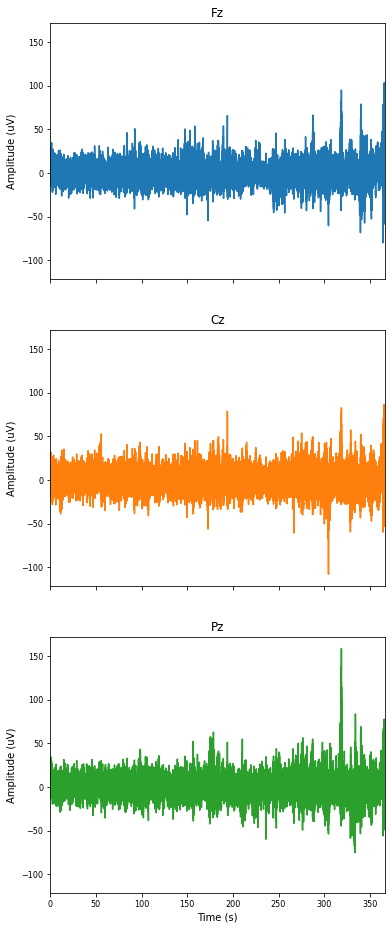

In [4]:
filtering = filters()
adaptiveFilterOutput = filtering.adaptive(rawEEG,rawEOG)
plots(time,adaptiveFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

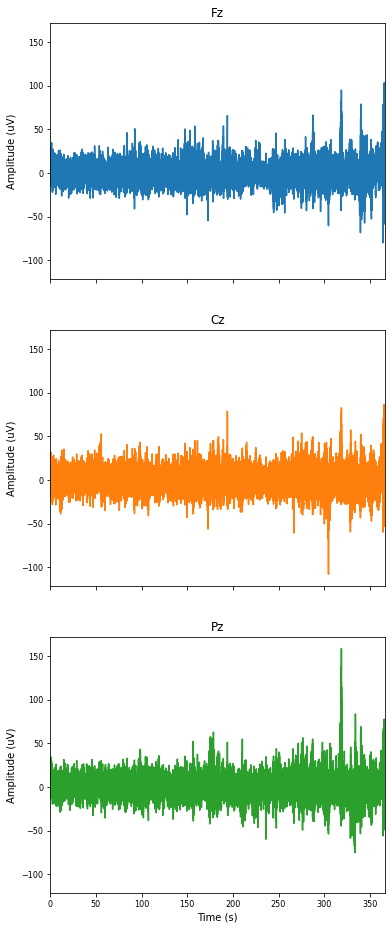

In [5]:
notchFilterOutput = filtering.notch(adaptiveFilterOutput,line,fs)
plots(time,adaptiveFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

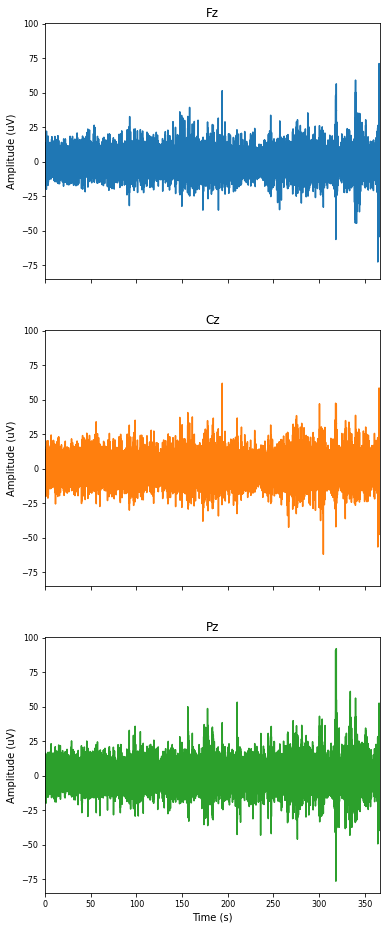

In [6]:
bandPassFilterOutput = filtering.butterBandPass(notchFilterOutput,lowcut=cfg.highPass,highcut=cfg.lowPass,fs=cfg.fs)
plots(time,bandPassFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

In [14]:
snr_Fz = sar(rawEEG[:,0],bandPassFilterOutput[:,0])
snr_Cz = sar(rawEEG[:,1],bandPassFilterOutput[:,1])
snr_Pz = sar(rawEEG[:,2],bandPassFilterOutput[:,2])
print("signal to noise ratio Fz: ",round(snr_Fz,6))
print("signal to noise ratio Cz: ",round(snr_Cz,6))
print("signal to noise ratio Pz: ",round(snr_Pz,6))

signal to noise ratio Fz:  -21.926788
signal to noise ratio Cz:  4.6e-05
signal to noise ratio Pz:  3.5e-05


In [8]:
erps = erpExtraction()
N1P3 = erps.N100P300(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip)
N4 = erps.N400(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip)
N1P3_Fz = N1P3[0]
N1P3_Cz = N1P3[1]
N1P3_Pz = N1P3[2]
N4_Fz = N4[0]
N4_Cz = N4[1]
N4_Pz = N4[2]
erp_latency = np.array(np.linspace(start=-100, stop=900, num=len(N1P3_Fz[0]),dtype=object),dtype=object)
std_N1P3_Fz = N1P3_Fz[0]

number of std tone event codes: 264
callback! epochs lost for std tone: 0.00%
number of dev tone event codes: 24
notice! epochs lost for dev tone: 0.00%
number of std tone event codes: 264
callback! epochs lost for std tone: 0.00%
number of dev tone event codes: 24
notice! epochs lost for dev tone: 0.00%
number of std tone event codes: 264
callback! epochs lost for std tone: 2.00%
number of dev tone event codes: 24
callback! epochs lost for dev tone: 4.00%
number of con word event codes: 36
notice! epochs lost for con word: 0.00%
number of inc word event codes: 36
callback! epochs lost for inc word: 2.00%
number of con word event codes: 36
notice! epochs lost for con word: 0.00%
number of inc word event codes: 36
callback! epochs lost for inc word: 2.00%
number of con word event codes: 36
callback! epochs lost for con word: 2.00%
number of inc word event codes: 36
callback! epochs lost for inc word: 5.00%


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


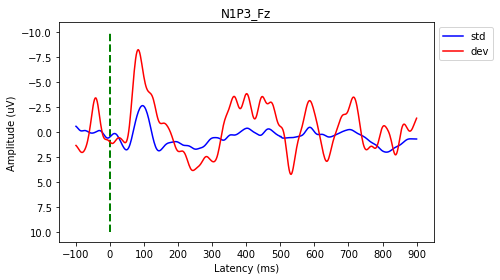

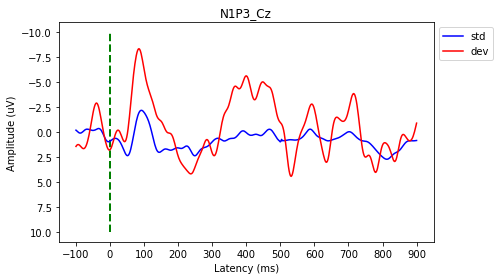

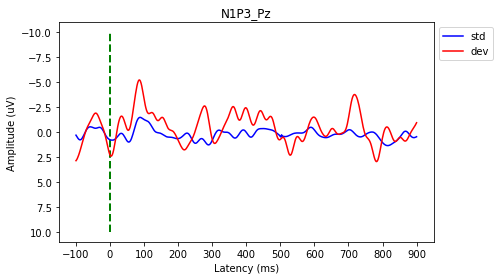

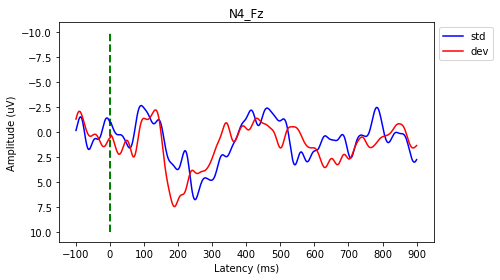

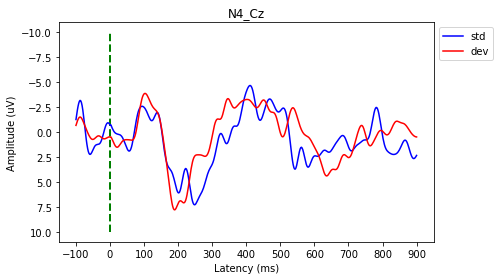

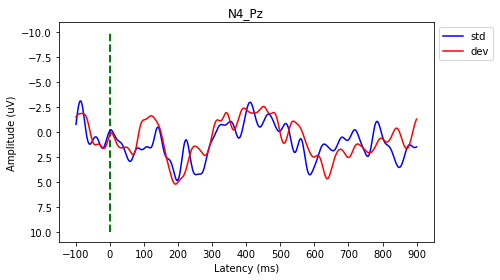

In [9]:
plot_ERPs(N1P3_Fz[0],N1P3_Fz[1],erp_latency,'N1P3_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N1P3_Cz[0],N1P3_Cz[1],erp_latency,'N1P3_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N1P3_Pz[0],N1P3_Pz[1],erp_latency,'N1P3_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N4_Fz[0],N4_Fz[1],erp_latency,'N4_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N4_Cz[0],N4_Cz[1],erp_latency,'N4_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N4_Pz[0],N4_Pz[1],erp_latency,'N4_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)

